In [144]:
import pandas as pd
import numpy as np
import json 
import sync_gg as gg
from pyecharts.charts import Geo,Map
from pyecharts import options as opts
from pyecharts.globals import ChartType, SymbolType

from pyecharts.faker import Collector, Faker

In [92]:
with open('data/diag.json') as f:
    diag_data = json.load(f)

In [93]:
diag_data

[['市南区', 5],
 ['市北区', 8],
 ['李沧区', 4],
 ['崂山区', 2],
 ['城阳区', 2],
 ['黄岛区', 9],
 ['即墨市', 8],
 ['胶州市', 1],
 ['平度市', 3],
 ['莱西市', 1]]

In [97]:
# 需要标注区的名字 
# 背景颜色可以调整一下 
c = (
        Geo()
        .add_schema(maptype="青岛", itemstyle_opts=opts.ItemStyleOpts(color=" #154360 ", border_color="#111"))
        .add(
            "确诊人数",
            diag_data,
            type_=ChartType.EFFECT_SCATTER,
        )
        .add(
            "",
            diag_data,
            type_=ChartType.HEATMAP,
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=15),
            title_opts=opts.TitleOpts(title='青岛各区市确诊人数'),
        )
    )


c.render_notebook()
c.render()

'C:\\Users\\Flora\\Documents\\python\\project\\qingdao-ncov-viz\\ds\\render.html'

In [51]:
#EFFECT_SCATTER
#HEATMAP

'C:\\Users\\Flora\\Documents\\python\\project\\qingdao-ncov-viz\\ds\\render.html'

In [82]:
c = (
    Map()
    .add("确诊人数", [list(z) for z in zip(district,dig_data)], "青岛",)
    .set_global_opts(title_opts=opts.TitleOpts(title="Map-基本示例"),visualmap_opts=opts.VisualMapOpts(max_=10, is_piecewise=True))
)

c.render_notebook()

## migration 

In [4]:
get_city_pair()

In [208]:
#you can also import data from local dir `dataset.csv`, but need to run the code first in order to get the most updated data.
data = gg.sheetsync('dataset','qd')

In [163]:
date = data['行程日期']
city_in = data['到达市']
city_out = data['出发市']

In [164]:
def Remove(tuples): 
    tuples = [t for t in tuples if t] 
    return tuples

date = Remove(date)
city_in = Remove(city_in)
city_out = Remove(city_out)

In [175]:
city = city_out + city_in
unique_city = set(city)

In [179]:
frequence = [city.count(c) for c in unique_city]
freq_city = list(zip(unique_city,frequence))
freq_city

[('荆州', 4),
 ('日照', 1),
 ('黄冈', 1),
 ('即墨', 1),
 ('昆明', 6),
 ('莱芜', 2),
 ('济南', 2),
 ('孝感', 2),
 ('莱西', 1),
 ('鄂州', 1),
 ('武汉', 13),
 ('青岛', 28),
 ('南昌', 2)]

In [165]:
city_pair =list(zip(city_out,city_in))
city_pair

[('日照', '青岛'),
 ('青岛', '武汉'),
 ('武汉', '青岛'),
 ('鄂州', '青岛'),
 ('青岛', '武汉'),
 ('武汉', '青岛'),
 ('青岛', '青岛'),
 ('武汉', '青岛'),
 ('武汉', '莱芜'),
 ('莱芜', '莱西'),
 ('昆明', '青岛'),
 ('武汉', '青岛'),
 ('武汉', '青岛'),
 ('青岛', '昆明'),
 ('青岛', '昆明'),
 ('青岛', '昆明'),
 ('武汉', '济南'),
 ('济南', '青岛'),
 ('武汉', '青岛'),
 ('武汉', '青岛'),
 ('武汉', '青岛'),
 ('黄冈', '南昌'),
 ('南昌', '即墨'),
 ('青岛', '孝感'),
 ('孝感', '青岛'),
 ('青岛', '荆州'),
 ('荆州', '青岛'),
 ('荆州', '青岛'),
 ('武汉', '青岛'),
 ('荆州', '青岛'),
 ('昆明', '青岛'),
 ('昆明', '青岛')]

In [ ]:
city_pair[0]

In [193]:
c = (
    Geo()
    .add_schema(maptype="china", itemstyle_opts=opts.ItemStyleOpts(color=" #154360 ", border_color="#111"))
    .add(
        '确诊患者的出入城市',
        freq_city,
        type_=ChartType.EFFECT_SCATTER,
        color="pink",label_opts=opts.LabelOpts(is_show=False)
    )
    .add(
        "确诊患者迁徙图",
        city_pair,
        type_=ChartType.LINES,
        effect_opts=opts.EffectOpts(
            symbol=SymbolType.DIAMOND, symbol_size=6, color="grey"
        ),label_opts=opts.LabelOpts(is_show=True),
        
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
    )
    #.set_series_opts(label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(title_opts=opts.TitleOpts(title="Geo-Lines"))
)

c.render('groline.html')
c.render_notebook()

In [194]:
import plotly.express as px

In [220]:
gender = Remove(data['性别'])
g = set(gender)
pct = [gender.count(c) for c in g]
pct = list(zip(g,pct))
pct

[('女', 22), ('男', 21)]

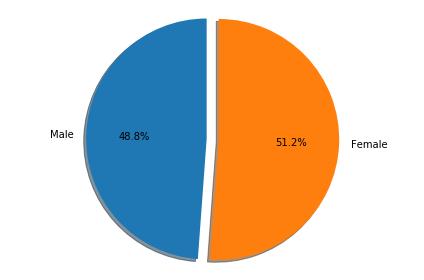

In [221]:
import matplotlib.pyplot as plt

# Pie chart
#can't show chinese here, react 可以吗？
#labels = ['男','女']
labels = ['Male','Female']
sizes = [21, 22]# only "explode" the 2nd slice (i.e. 'Hogs')
explode = ( 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()